In [2]:
import pandas as pd
import numpy as np



def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    return pd.read_csv(file_path)

In [3]:
df = load_data('data/bank_data_train.csv')
missing_pct = df['TARGET'].isnull().sum() / len(df) * 100

print(df.shape)
print(f"Percentage of missing TARGET values: {missing_pct:.2f}%")

(355190, 116)
Percentage of missing TARGET values: 0.00%


In [6]:
def explore_data(df):
    """Display basic information about the DataFrame and drop 'ID' if present. Returns the (possibly) modified DataFrame."""
    print("DataFrame Info:")
    df.info()
    
    # drop unnecessary column if it exists
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
        print("\nDropped column: 'ID'")
    else:
        print("\nColumn 'ID' not found; skipping drop.")
    
    print("\nDataFrame Description (numeric):")
    display(df.describe())
    
    print("\nDataFrame Description (object):")
    display(df.describe(include=['object']))
    
    # optionally show missing values
    print("\nMissing Values:")
    df_info = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    df_info['Percentage'] = (df_info['Missing Values'] / len(df)) * 100
    
    #siwich column into rows for better display

    df_info = df_info.transpose()
    display(df_info)
    # display(df.isnull().sum())
    
    # check the distribution of target column
    print(df['TARGET'].value_counts())
    return df

df = explore_data(df)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB

Dropped column: 'ID'

DataFrame Description (numeric):


,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,316867.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,0.085249,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,0.142310,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,0.027117,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,0.110005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



DataFrame Description (object):


,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
count,69421,68234,59361,44781,210811,57257,68104,57257,57256,60545,67362,67362,355190
unique,21,13,5,4,19588,2,17,2,2,4,4,4,12
top,FRIEND,M,SO,SPECIALIST,ДИРЕКТОР,N,H,N,N,SPECIALIST,PRIVATE,PRIVATE,102
freq,24896,30724,28056,25123,11200,36332,42459,52750,32843,36622,59087,59087,116986



Missing Values:


,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
Missing Values,0.0,38323.000000,200027.000000,294640.000000,200027.000000,200027.000000,0.0,278078.000000,278078.000000,38323.000000,...,0.0,259477.000000,261742.000000,257015.000000,259477.000000,0.0,261742.000000,261742.000000,261742.000000,0.0
Percentage,0.0,10.789437,56.315493,82.952786,56.315493,56.315493,0.0,78.289929,78.289929,10.789437,...,0.0,73.053014,73.690701,72.359864,73.053014,0.0,73.690701,73.690701,73.690701,0.0


TARGET
0    326265
1     28925
Name: count, dtype: int64


In [7]:
df.shape

(355190, 115)

In [57]:
# Handle data types

# def convert_data_types(df):
#     # get columns with object data type
#     obj_cols = df.select_dtypes(include=['object']).columns.tolist()
#     print(f"Object columns to convert: {obj_cols}")

    
#     # Apply one-hot encoding to categorical columns
#     clean_df = pd.get_dummies(df,
#                         columns=obj_cols,
#                         drop_first=True).astype(float)
#     print("Converted object columns to numerical using one-hot encoding.")
#     return clean_df



# df = convert_data_types(df.copy())



In [8]:
existing_values = set()
for val in df['APP_MARITAL_STATUS']:
    if pd.notnull(val) or val not in existing_values:
        existing_values.add(val)
existing_values

{' ', 'C', 'D', 'M', 'N', 'T', 'V', 'W', 'd', 'm', nan, 't', 'v', 'w'}

In [9]:
# For categorical columns, use Chi-Square test or Cramér's V
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Measure association between categorical x and binary y (TARGET)"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Check APP_MARITAL_STATUS
# Remove nulls first
df_temp = df[['APP_MARITAL_STATUS', 'TARGET']].dropna()
correlation = cramers_v(df_temp['APP_MARITAL_STATUS'], df_temp['TARGET'])
print(f"Cramér's V: {correlation:.3f}")


Cramér's V: 0.030


In [13]:
# For columns with >70% missing
# drop corr bitween -0.05 to 0.05
high_missing = df.columns[df.isnull().sum() / len(df) > 0.70]
for col in high_missing:
    if col == 'TARGET':
        continue
    # coerce to numeric where possible, compute correlation with TARGET
    
    if df[col].dtype == 'object':
        # categorical column
        corr = cramers_v(df[col].dropna(), df.loc[df[col].notnull(), 'TARGET'])
    else:
        # numerical column
        series_num = pd.to_numeric(df[col], errors='coerce')
        corr = series_num.corr(df['TARGET'])
    
    print(type(corr))
    print(type(corr))
    
    # series_num = pd.to_numeric(df[col], errors='coerce')
    
    
    
    # corr = cramers_v(df[col].dropna(), df.loc[df[col].notnull(), 'TARGET'])
    missing_pct = df[col].isnull().sum() / len(df) * 100
    corr_str = f"{corr:.3f}" if pd.notnull(corr) else "N/A"
    print(f"{col}: Missing={missing_pct:.1f}%, Correlation={corr_str}")



<class 'numpy.float64'>
<class 'numpy.float64'>
APP_REGISTR_RGN_CODE: Missing=83.0%, Correlation=-0.028
<class 'numpy.float64'>
<class 'numpy.float64'>
CNT_TRAN_AUT_TENDENCY1M: Missing=78.3%, Correlation=0.076
<class 'numpy.float64'>
<class 'numpy.float64'>
SUM_TRAN_AUT_TENDENCY1M: Missing=78.3%, Correlation=0.071
<class 'numpy.float64'>
<class 'numpy.float64'>
CLNT_TRUST_RELATION: Missing=80.5%, Correlation=0.029
<class 'numpy.float64'>
<class 'numpy.float64'>
APP_MARITAL_STATUS: Missing=80.8%, Correlation=0.030
<class 'numpy.float64'>
<class 'numpy.float64'>
CNT_TRAN_MED_TENDENCY1M: Missing=80.6%, Correlation=0.094
<class 'numpy.float64'>
<class 'numpy.float64'>
APP_KIND_OF_PROP_HABITATION: Missing=83.3%, Correlation=0.008
<class 'numpy.float64'>
<class 'numpy.float64'>
CLNT_JOB_POSITION_TYPE: Missing=87.4%, Correlation=0.036
<class 'numpy.float64'>
<class 'numpy.float64'>
APP_DRIVING_LICENSE: Missing=83.9%, Correlation=0.031
<class 'numpy.float64'>
<class 'numpy.float64'>
APP_EDUCAT

In [ ]:
# For categorical columns, use Chi-Square test or Cramér's V
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Measure association between categorical x and binary y (TARGET)"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Check APP_MARITAL_STATUS
# Remove nulls first
df_temp = df[['APP_MARITAL_STATUS', 'TARGET']].dropna()
correlation = cramers_v(df_temp['APP_MARITAL_STATUS'], df_temp['TARGET'])
print(f"Cramér's V: {correlation:.3f}")


In [45]:
df = load_data('data/bank_data_train.csv')

In [46]:
import numpy as np


def normalize_categorical_columns(df):
    """
    Normalize categorical columns by converting to lowercase/uppercase
    and stripping whitespace
    """
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in cat_cols:
        # Convert to string, lowercase, and strip whitespace
        df[col] = df[col].astype(str).str.upper()
        df[col] = df[col].str.strip()
        df[col] = df[col].replace('NAN', np.nan)  # Replace 'NA' strings with NaN
        df[col] = df[col].replace('', np.nan)  # Replace empty strings with NaN
    
    return df
df = normalize_categorical_columns(df)

In [47]:
print(df['APP_MARITAL_STATUS'].value_counts())
# count null values
print("null values",df['APP_MARITAL_STATUS'].isnull().sum())
print("*******************************")
existing_values = set()
for val in df['APP_MARITAL_STATUS']:
    if pd.notnull(val) or val not in existing_values:
        existing_values.add(val)
existing_values

APP_MARITAL_STATUS
M    32185
V    23075
D     7777
T     3392
N      936
W      697
C      155
Name: count, dtype: int64
null values 286973
*******************************


{'C', 'D', 'M', 'N', 'T', 'V', 'W', nan}

In [31]:
existing_values = []
for val in df['APP_MARITAL_STATUS']:
    if pd.notnull(val) or val not in existing_values:
        existing_values.add(val)
existing_values

AttributeError: 'list' object has no attribute 'add'

In [ ]:
# Handle data types

def convert_data_types(df):
    print("Original shape:", df.shape)
    
    # Get object columns
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()
    print(f"Object columns: {obj_cols}")
    
    # First, try to convert object columns to numeric where possible
    for col in obj_cols:
        try:
            # Try to convert to numeric
            converted = pd.to_numeric(df[col], errors='coerce')
            # If at least 90% conversion success, use numeric
            if converted.notna().mean() > 0.9:
                df[col] = converted
                print(f"Converted {col} to numeric")
        except:
            continue
    
    # Update object columns list after numeric conversion
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Identify which columns to one-hot encode
    # Typically: low cardinality categorical columns
    cat_cols_to_encode = []
    for col in obj_cols:
        # Only one-hot encode if low cardinality (e.g., less than 10 unique values)
        if df[col].nunique() < 10:
            cat_cols_to_encode.append(col)
        else:
            print(f"Skipping one-hot for {col}: {df[col].nunique()} unique values")
    
    print(f"Categorical columns to one-hot encode: {cat_cols_to_encode}")
    
    # Apply one-hot encoding only to selected categorical columns
    df = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)
    
    # For high-cardinality categorical columns, consider other encoding strategies
    # or handle them separately
    
    print("Final shape:", df.shape)
    return df



df_cleaned = convert_data_types(df)



In [ ]:

for col in df_cleaned.columns:
    if col.startswith('APP_MARITAL_STATUS'):
        print(col)
        

In [ ]:
# check existence
print('CLNT_TRUST_RELATION' in df.columns)

# list generated dummy columns
[d for d in df.columns if d.startswith('CLNT_TRUST_RELATION')][:20]

# print the dummy columns (or subset)
df.filter(regex='^CLNT_TRUST_RELATION').head()

display(df.head())
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns to convert: {obj_cols}")


# print(df.info())

In [ ]:
for col in df:
    column_type = df[col].dtype
    if column_type != 'int64' and column_type != 'float64':
        print(f"{col}: {column_type}")

In [ ]:
print("hello")

In [ ]:
# def clean_and_encode(df):
    
    # print("Initial data types:")
    # for col in df.columns:
    #     if df[col].dtype != 'int64' and df[col].dtype != 'float64':
    #         print(f"  {col}: {df[col].dtype}")
    
    # Separate columns by type
object_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()


In [ ]:

print(f"\nObject columns to encode ({len(object_cols)}): {object_cols}")
print(f"Boolean columns to convert to int ({len(bool_cols)}): {bool_cols[:5]}...")  # Show first 5



In [ ]:
#print only the rows that are not null
for row in df['APP_MARITAL_STATUS']:
    if pd.notnull(row):
        print(row)
# print(df['APP_TRAVEL_PASS'])

In [ ]:
# Encode object columns
if object_cols:
    df = pd.get_dummies(df, columns=object_cols, drop_first=True, dtype=int)

# Convert boolean columns to int
if bool_cols:
    df[bool_cols] = df[bool_cols].astype(int)

# Verify all columns are now numeric
print("\nFinal data types:")
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'int', 'float64', 'float32', 'float']).columns
non_numeric = [col for col in df.columns if col not in numeric_cols]

if non_numeric:
    print(f"Warning: {len(non_numeric)} non-numeric columns remain: {non_numeric}")
else:
    print("All columns are now numeric!")

print(f"Final shape: {df.shape}")
#     return df

# # Apply the cleaning
# df = clean_and_encode(df.copy())

In [ ]:
df = load_data('data/bank_data_train.csv')

def convert_data_types_fixed(df, target_col='TARGET'):
    df = df.copy()
    # Preserve ID and target if present
    has_id = 'ID' in df.columns
    ids = df['ID'].copy() if has_id else None
    has_target = target_col in df.columns
    y = df[target_col].copy() if has_target else None

    # Drop ID and target for processing
    drop_cols = []
    if has_id:
        drop_cols.append('ID')
    if has_target:
        drop_cols.append(target_col)
    if drop_cols:
        df = df.drop(columns=drop_cols)

    # Try numeric conversion for object columns
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in obj_cols:
        conv = pd.to_numeric(df[col], errors='coerce')
        if conv.notna().mean() > 0.9:
            df[col] = conv

    # Remaining categorical (object) columns
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    if cat_cols:
        low_card = [c for c in cat_cols if df[c].nunique() < 10]
        high_card = [c for c in cat_cols if df[c].nunique() >= 10]

        # One-hot encode low cardinality
        if low_card:
            df = pd.get_dummies(df, columns=low_card, drop_first=True, dtype=int)

        # Drop high cardinality columns (or handle differently)
        if high_card:
            print(f"Dropping high cardinality columns: {high_card}")
            df = df.drop(columns=high_card)

    # Re-add ID and target if they existed
    if has_id:
        df.insert(0, 'ID', ids)
    if has_target:
        df[target_col] = y

    return df

# Apply to single dataframe
df = convert_data_types_fixed(df)


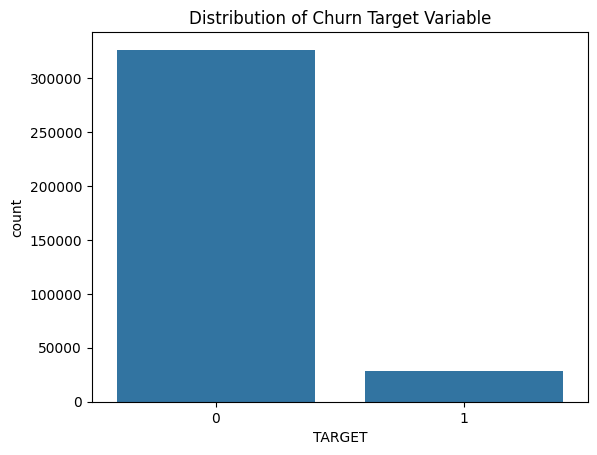

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Churn Target Variable')
plt.show()





In [40]:
import category_encoders as ce
import pandas as pd

def fit_encoders(X_train, y_train):
    """
    Fit encoders on training data and return fitted encoders.
    """
    # Get object columns
    obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    
    # Try numeric conversion
    numeric_conversions = {}
    for col in obj_cols:
        converted = pd.to_numeric(X_train[col], errors='coerce')
        if converted.notna().mean() > 0.9:
            numeric_conversions[col] = True
    print("numeric conversion", numeric_conversions)
    # Update object columns
    obj_cols = [col for col in obj_cols if col not in numeric_conversions]
    
    # Categorize by cardinality
    low_card_cols = []
    high_card_cols = []
    
    for col in obj_cols:
        if X_train[col].isnull().all():
            continue
        
        unique_count = X_train[col].nunique(dropna=True)
        
        if unique_count < 10:
            low_card_cols.append(col)
        else:
            high_card_cols.append(col)
    
    # Fit target encoder on training data
    target_encoder = None
    if high_card_cols:
        target_encoder = ce.TargetEncoder(cols=high_card_cols, smoothing=1.0)
        valid_mask = X_train[high_card_cols].notna().all(axis=1) & y_train['TARGET'].notna()
        target_encoder.fit(X_train.loc[valid_mask, high_card_cols], y_train.loc[valid_mask, 'TARGET'])
    
    return {
        'numeric_conversions': numeric_conversions,
        'low_card_cols': low_card_cols,
        'high_card_cols': high_card_cols,
        'target_encoder': target_encoder,
        'global_mean': y_train['TARGET'].mean()
    }


def transform_with_encoders(X, encoders_dict):
    """
    Transform data using pre-fitted encoders.
    """
    X = X.copy()
    
    # Apply numeric conversions
    for col in encoders_dict['numeric_conversions']:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    
    # Drop all-null columns
    obj_cols = X.select_dtypes(include=['object']).columns
    for col in obj_cols:
        if X[col].isnull().all():
            X = X.drop(columns=[col])
    
    # Target encode high-cardinality columns
    if encoders_dict['high_card_cols'] and encoders_dict['target_encoder']:
        high_card_cols = encoders_dict['high_card_cols']
        print(f"\n\nTarget encoding: {high_card_cols}\n\n")
        for col in high_card_cols:
            if col in X.columns:
                # Transform using fitted encoder
                print(f"Encoding column: {col}")
                print()
                try:
                    # Transform using the encoder fitted on all high-cardinality cols,
                    # then take the encoded series for the current column
                    encoded = encoders_dict['target_encoder'].transform(X[encoders_dict['high_card_cols']])[col]
                    X[col] = encoded
                    # Fill unseen / missing encodings with global mean
                    X[col].fillna(encoders_dict['global_mean'], inplace=True)
                except Exception:
                    # If transform fails, fall back to global mean
                    X[col] = encoders_dict['global_mean']
        #         X = X.drop(columns=[col])
                
                
                
        #         X[f"{col}"] = encoded[col]
                
        #         # Fill nulls with global mean
        #         X[f"{col}"].fillna(encoders_dict['global_mean'], inplace=True)
        
        # Drop original columns
        # X = X.drop(columns=[col for col in high_card_cols if col in X.columns])
    
    # One-hot encode low-cardinality columns
    if encoders_dict['low_card_cols']:
        print(f"\nOne-hot encoding: {encoders_dict['low_card_cols']}")

        X = pd.get_dummies(X, columns=encoders_dict['low_card_cols'], drop_first=True)
    
    return X


In [41]:
# split data train test
from sklearn.model_selection import train_test_split

y = pd.DataFrame()
y['TARGET'] = df['TARGET']
X = df.drop(columns=['TARGET'])
X_train, X_test, y_train, y_test = train_test_split(
                            X,y,
                            test_size=0.2,
                            random_state=42,
                            stratify=y)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split data
y = df[['TARGET']]
X = df.drop(columns=['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Fit encoders on TRAINING data only
print("\n" + "="*80)
print("Fitting encoders on training data...")
print("="*80)
encoders = fit_encoders(X_train, y_train)
for key, value in encoders.items():
        print(f"{key}: {value}")
# # Transform both train and test using the SAME encoders
print("\nTransforming training data...")
X_train_encoded = transform_with_encoders(X_train, encoders)

print("\nTransforming test data...")
X_test_encoded = transform_with_encoders(X_test, encoders)


print(f"\nAfter encoding - Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

# Just to make sure not needed in our case -------------------------------------
# Align columns (ensure train and test have same columns)
print("\nAligning train/test columns...")
train_cols = set(X_train_encoded.columns)
test_cols = set(X_test_encoded.columns)

# Add missing columns to test (fill with 0)
for col in train_cols - test_cols:
    X_test_encoded[col] = 0
    print(f"Added missing column to test: {col}")

# Remove extra columns from test
for col in test_cols - train_cols:
    X_test_encoded = X_test_encoded.drop(columns=[col])
    print(f"Removed extra column from test: {col}")
#-------------------------------------------------------------------------------------

# # Reorder test columns to match train
# X_test_encoded = X_test_encoded[X_train_encoded.columns]

# print(f"\nAfter alignment - Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

# # Impute missing values in BOTH train and test
# print("\n" + "="*80)
# print("Imputing missing values...")
# print("="*80)

# # Calculate means from TRAINING data only
# imputation_values = X_train_encoded.mean()

# # Apply to both train and test
# for col in X_train_encoded.columns:
#     if X_train_encoded[col].isnull().any():
#         X_train_encoded[col].fillna(imputation_values[col], inplace=True)
#         print(f"Imputed train {col}: {imputation_values[col]:.4f}")
    
#     if X_test_encoded[col].isnull().any():
#         X_test_encoded[col].fillna(imputation_values[col], inplace=True)
#         print(f"Imputed test {col}: {imputation_values[col]:.4f}")

# # Verify no nulls remain
# print(f"\nTrain nulls: {X_train_encoded.isnull().sum().sum()}")
# print(f"Test nulls: {X_test_encoded.isnull().sum().sum()}")

# # Apply SMOTE to training data only
# print("\n" + "="*80)
# print("Applying SMOTE to training data...")
# print("="*80)
# print(f"Before SMOTE: {y_train['TARGET'].value_counts().to_dict()}")

# smote = SMOTE(sampling_strategy='minority', random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# print(f"After SMOTE: {y_train_balanced['TARGET'].value_counts().to_dict()}")
# print(f"Train shape: {X_train_balanced.shape}")

# print("\n" + "="*80)
# print("Data preprocessing complete!")
# print("="*80)
# print(f"Final shapes:")
# print(f"  X_train_balanced: {X_train_balanced.shape}")
# print(f"  y_train_balanced: {y_train_balanced.shape}")
# print(f"  X_test_encoded: {X_test_encoded.shape}")
# print(f"  y_test: {y_test.shape}")


Train shape: (284152, 115), Test shape: (71038, 115)

Fitting encoders on training data...
numeric conversion {}
numeric_conversions: {}
low_card_cols: ['APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE', 'APP_DRIVING_LICENSE', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE']
high_card_cols: ['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'CLNT_JOB_POSITION', 'APP_EDUCATION', 'PACK']
target_encoder: TargetEncoder(cols=['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS',
                    'CLNT_JOB_POSITION', 'APP_EDUCATION', 'PACK'],
              smoothing=1.0)
global_mean: 0.08143528815563501

Transforming training data...


Target encoding: ['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'CLNT_JOB_POSITION', 'APP_EDUCATION', 'PACK']


Encoding column: CLNT_TRUST_RELATION



/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(encoders_dict['global_mean'], inplace=True)
/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Encoding column: APP_MARITAL_STATUS

Encoding column: CLNT_JOB_POSITION



/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(encoders_dict['global_mean'], inplace=True)
/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Encoding column: APP_EDUCATION

Encoding column: PACK



/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(encoders_dict['global_mean'], inplace=True)



One-hot encoding: ['APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE', 'APP_DRIVING_LICENSE', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE']

Transforming test data...


Target encoding: ['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS', 'CLNT_JOB_POSITION', 'APP_EDUCATION', 'PACK']


Encoding column: CLNT_TRUST_RELATION

Encoding column: APP_MARITAL_STATUS

Encoding column: CLNT_JOB_POSITION

Encoding column: APP_EDUCATION

Encoding column: PACK



/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(encoders_dict['global_mean'], inplace=True)
/tmp/ipykernel_36376/912202078.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T


One-hot encoding: ['APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE', 'APP_DRIVING_LICENSE', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE']

After encoding - Train: (284152, 126), Test: (71038, 126)

Aligning train/test columns...
